In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [ ]:
import scipy.io
import os
import numpy as np

# Paths to the MAT and LAY folders
mat_folder = '/content/drive/MyDrive/projects/EEG DATASET/MAT'  # Update with your actual path
lay_folder = '/content/drive/MyDrive/projects/EEG DATASET/LAY'  # Update with your actual path

# Function to load .mat files and inspect their content
def load_mat_file(file_path):
    # Load the .mat file
    mat_data = scipy.io.loadmat(file_path)

    # List all variables in the .mat file
    print("Variables in the MAT .mat file:", mat_data.keys())

    return mat_data

# Function to load .mat files in the LAY folder and inspect the content
def load_lay_file(file_path):
    # Load the .mat file
    lay_data = scipy.io.loadmat(file_path)

    # List all variables in the .mat file
    print("Variables in the LAY .mat file:", lay_data.keys())

    return lay_data

# Load and inspect one sample .mat file from the MAT folder (EEG data)
sample_mat_file = os.path.join(mat_folder, 'EEG01R1.mat')  # Replace 'EEG01R1.mat' with your actual file
mat_data = load_mat_file(sample_mat_file)

# Explore the structure and key variables in the MAT file
# Assuming 'eegData' is the variable containing the EEG data
eeg_data = mat_data.get('eegData', None)
if eeg_data is not None:
    print("Shape of EEG data:", eeg_data.shape)  # Should be (channels, samples)
else:
    print("No EEG data found in MAT file.")

# Now, let's load and inspect a sample file from the LAY folder (task timestamps)
sample_lay_file = os.path.join(lay_folder, 'EEG01R1.mat')  # Replace with your actual file name
lay_data = load_lay_file(sample_lay_file)

# Explore the structure and key variables in the LAY file
# Check if task-related data like 'comExpControl' or similar exists
task_times = lay_data.get('comExpControl', None)  # Replace with the actual variable name if different
if task_times is not None:
    print("Task start and end times:", task_times)
else:
    print("No task times found in LAY file.")


Variables in the MAT .mat file: dict_keys(['__header__', '__version__', '__globals__', 'dataSampleRates', 'dataSamples', 'channelLabels', 'eegData', 'eegFS'])
Shape of EEG data: (16, 750275)
Variables in the LAY .mat file: dict_keys(['__header__', '__version__', '__globals__', 'tasks', 'comSignalLoss', 'comExpControl', 'comOther', 'subStroop', 'subTrail'])
Task start and end times: [[ 633  784]
 [ 785 1037]
 [1038 1268]
 [1269 1508]
 [1509 1748]
 [1749 2046]
 [2047 2135]
 [2136 2922]
 [   6  606]]


In [ ]:
import scipy.io
import os
import numpy as np



# Function to load .mat files and inspect their content (EEG data)
def load_mat_file(file_path):
    # Load the .mat file
    mat_data = scipy.io.loadmat(file_path)
    return mat_data

# Function to load .mat files in the LAY folder (task timestamps)
def load_lay_file(file_path):
    # Load the .mat file
    lay_data = scipy.io.loadmat(file_path)
    return lay_data

# Function to segment EEG data based on task start and end times
def segment_eeg_data(eeg_data, task_times, sample_rate=250):
    # Convert task start and end times from seconds to sample indices
    task_segments = []

    for task_time in task_times:
        start_time, end_time = task_time
        start_sample = int(start_time * sample_rate)  # Convert to sample index
        end_sample = int(end_time * sample_rate)      # Convert to sample index

        # Segment EEG data for this task
        eeg_segment = eeg_data[:, start_sample:end_sample]
        task_segments.append(eeg_segment)

    return task_segments

# Loop through all files in the MAT folder
for mat_file_name in os.listdir(mat_folder):
    if mat_file_name.endswith('.mat'):  # Check for .mat files
        mat_file_path = os.path.join(mat_folder, mat_file_name)

        # Load EEG data from MAT file
        mat_data = load_mat_file(mat_file_path)

        # Extract EEG data and other variables
        eeg_data = mat_data.get('eegData', None)
        if eeg_data is None:
            print(f"No EEG data found in {mat_file_name}")
            continue

        # Load the corresponding LAY file (same name as MAT file)
        lay_file_path = os.path.join(lay_folder, mat_file_name)  # Same name in the LAY folder

        if os.path.exists(lay_file_path):
            lay_data = load_lay_file(lay_file_path)

            # Extract task start and end times (comExpControl variable)
            task_times = lay_data.get('comExpControl', None)
            if task_times is not None:
                # Segment the EEG data based on task times
                task_segments = segment_eeg_data(eeg_data, task_times)

                # Print the shapes of the task segments
                for i, segment in enumerate(task_segments):
                    print(f"{mat_file_name} - Task {i + 1} segment shape: {segment.shape}")
            else:
                print(f"No task times found in {lay_file_name}")
        else:
            print(f"LAY file for {mat_file_name} not found.")


EEG01R1.mat - Task 1 segment shape: (16, 37750)
EEG01R1.mat - Task 2 segment shape: (16, 63000)
EEG01R1.mat - Task 3 segment shape: (16, 57500)
EEG01R1.mat - Task 4 segment shape: (16, 59750)
EEG01R1.mat - Task 5 segment shape: (16, 59750)
EEG01R1.mat - Task 6 segment shape: (16, 74250)
EEG01R1.mat - Task 7 segment shape: (16, 22000)
EEG01R1.mat - Task 8 segment shape: (16, 196500)
EEG01R1.mat - Task 9 segment shape: (16, 150000)
EEG021.mat - Task 1 segment shape: (16, 34250)
EEG021.mat - Task 2 segment shape: (16, 58500)
EEG021.mat - Task 3 segment shape: (16, 49750)
EEG021.mat - Task 4 segment shape: (16, 67750)
EEG021.mat - Task 5 segment shape: (16, 36000)
EEG021.mat - Task 6 segment shape: (16, 102750)
EEG021.mat - Task 7 segment shape: (16, 22250)
EEG021.mat - Task 8 segment shape: (16, 211750)
EEG021.mat - Task 9 segment shape: (16, 150500)
EEG031.mat - Task 1 segment shape: (16, 35500)
EEG031.mat - Task 2 segment shape: (16, 61000)
EEG031.mat - Task 3 segment shape: (16, 50750)

In [ ]:
import scipy.io
import os



# Function to load .mat files in the LAY folder (task information)
def load_lay_file(file_path):
    # Load the .mat file
    lay_data = scipy.io.loadmat(file_path)
    return lay_data

# Set to store unique task names
unique_tasks = set()

# Loop through all files in the LAY folder
for lay_file_name in os.listdir(lay_folder):
    if lay_file_name.endswith('.mat'):  # Check for .mat files
        lay_file_path = os.path.join(lay_folder, lay_file_name)

        # Load task information from LAY file
        lay_data = load_lay_file(lay_file_path)

        # Extract task names from the 'tasks' variable (assuming this holds task names)
        tasks = lay_data.get('tasks', None)
        if tasks is not None:
            # Convert tasks to string and add to the unique_tasks set
            for task in tasks.flatten():  # Flatten in case 'tasks' is an array
                unique_tasks.add(str(task))  # Convert each task to a string and add it

# Print all unique tasks
print("Unique tasks in the dataset:")
for task in unique_tasks:
    print(task)


Unique tasks in the dataset:
['EDS']
['SHVLT']
['SHVLT delay/recog']
['EHVLT delay/recog']
['SST']
['SModbent']
['ETM']
['SDS']
['EBaseline']
['SSDM']
['SCOWAT']
['STM']
['EModbent']
['ECOWAT']
['EST']
['EHVLT']
['SBaseline']
['ESDM']


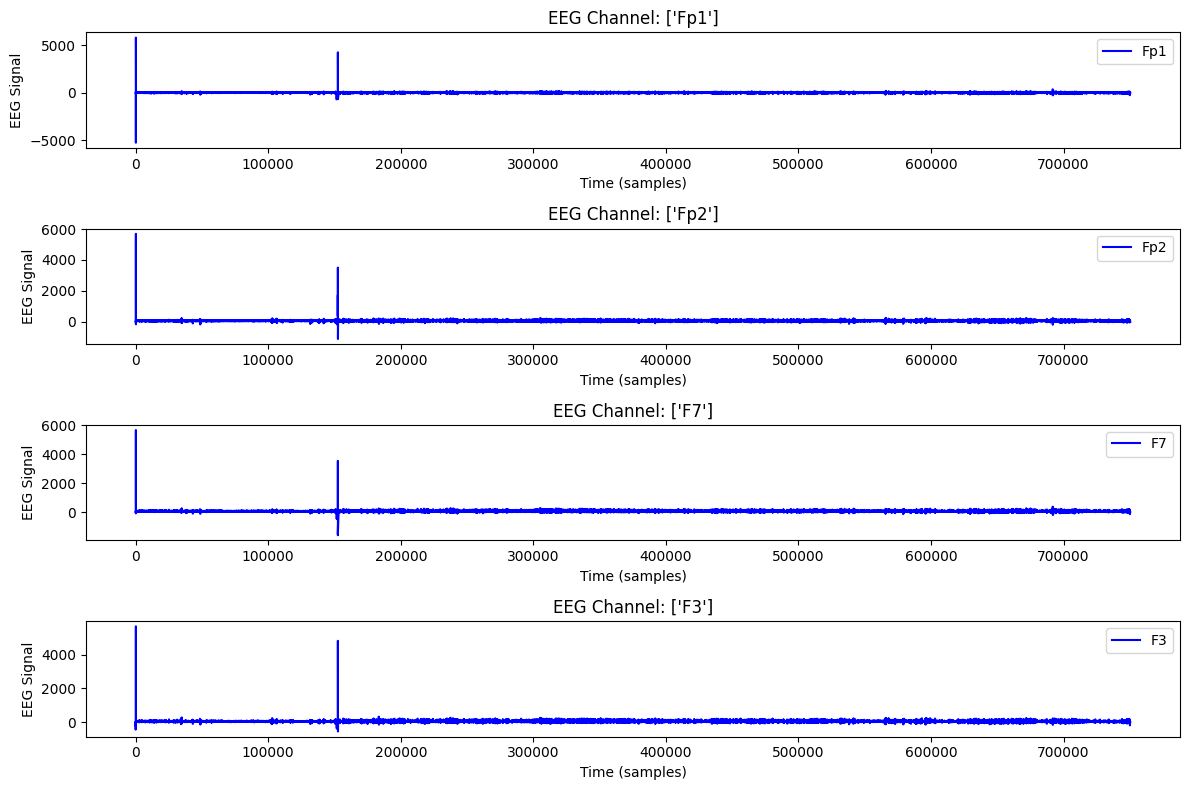

In [ ]:
import scipy.io
import os
import numpy as np
import matplotlib.pyplot as plt

# Load one MAT file from the MAT folder (EEG data)
def load_mat_file(file_path):
    mat_data = scipy.io.loadmat(file_path)
    return mat_data


sample_mat_file = '/content/drive/MyDrive/projects/EEG DATASET/MAT/EEG01R1.mat'  # Update with your actual file
mat_data = load_mat_file(sample_mat_file)

# Extract EEG data and channel labels
eeg_data = mat_data['eegData']
channel_labels = mat_data['channelLabels']

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.plot(eeg_data[i, :], label=channel_labels[0][i], color='b')
    plt.title(f"EEG Channel: {channel_labels[0][i]}")
    plt.xlabel('Time (samples)')
    plt.ylabel('EEG Signal')
    plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-3-55a8b5ed5094>:67: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = max(0, int(start_time * fs))
<ipython-input-3-55a8b5ed5094>:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = min(eeg_data.shape[1], int(end_time * fs))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.0876 - loss: 3.0528 - val_accuracy: 0.1594 - val_loss: 2.7589
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1664 - loss: 2.7218 - val_accuracy: 0.1304 - val_loss: 2.5048
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1956 - loss: 2.5596 - val_accuracy: 0.1522 - val_loss: 2.5467
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2111 - loss: 2.4378 - val_accuracy: 0.1957 - val_loss: 2.5271
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1704 - loss: 2.5648 - val_accuracy: 0.1522 - val_loss: 2.4911
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2058 - loss: 2.3815 - val_accuracy: 0.2029 - val_loss: 2.4194
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2439 - loss: 2.3273 - val_accuracy: 0.1812 - val_loss: 2.4128
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2162 - loss: 2.3604 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


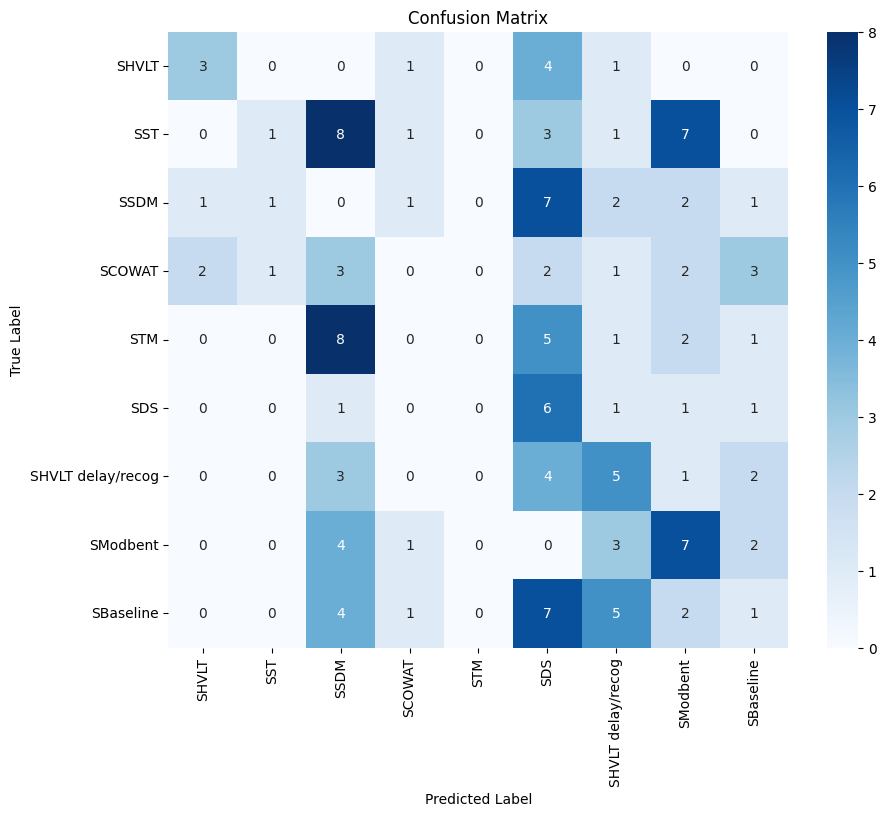

In [ ]:
import scipy.io
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Paths to EEG dataset
mat_folder = '/content/drive/MyDrive/projects/EEG DATASET/MAT'
lay_folder = '/content/drive/MyDrive/projects/EEG DATASET/LAY'


selected_tasks = ['SHVLT', 'SST', 'SSDM', 'SCOWAT', 'STM', 'SDS', 'SHVLT delay/recog', 'SModbent', 'SBaseline']

sampling_rate = 250

def extract_features(eeg_data, fs=250, nperseg=256):
    features = []
    for channel in range(eeg_data.shape[0]):
        freqs, psd = welch(eeg_data[channel], fs=fs, nperseg=nperseg)
        features.extend(psd)
        features.append(np.mean(eeg_data[channel]))
        features.append(np.std(eeg_data[channel]))
        features.append(np.median(eeg_data[channel]))
        features.append(np.min(eeg_data[channel]))
        features.append(np.max(eeg_data[channel]))
    return features

def load_eeg_data():
    X_features, y = [], []

    for mat_file_name in os.listdir(mat_folder):
        if mat_file_name.endswith('.mat'):
            mat_file_path = os.path.join(mat_folder, mat_file_name)
            mat_data = scipy.io.loadmat(mat_file_path)
            eeg_data = mat_data.get('eegData', None)
            fs = mat_data.get('eegFS', sampling_rate)  # Using explicitly set rate

            if eeg_data is None or eeg_data.shape[1] == 0:
                continue

            lay_file_path = os.path.join(lay_folder, mat_file_name)
            if os.path.exists(lay_file_path):
                lay_data = scipy.io.loadmat(lay_file_path)
                task_times = lay_data.get('comExpControl', None)
                task_labels = lay_data.get('tasks', None)

                if task_times is not None and isinstance(task_times, np.ndarray) and task_labels is not None:
                    for i, time_range in enumerate(task_times):
                        if len(time_range) < 2:
                            continue

                        start_time = float(time_range[0].item()) if isinstance(time_range[0], np.ndarray) else float(time_range[0])
                        end_time = float(time_range[1].item()) if isinstance(time_range[1], np.ndarray) else float(time_range[1])

                        if not np.isfinite(start_time) or not np.isfinite(end_time) or start_time >= end_time:
                            continue

                        start_sample = max(0, int(start_time * fs))
                        end_sample = min(eeg_data.shape[1], int(end_time * fs))

                        if start_sample >= end_sample:
                            continue

                        eeg_segment = eeg_data[:, start_sample:end_sample]

                        if eeg_segment is None or eeg_segment.shape[1] == 0:
                            print(f"Skipping empty segment: Task {i} from {start_time}s to {end_time}s in {mat_file_name}")
                            continue

                        if i < len(task_labels) and isinstance(task_labels[i][0], np.ndarray):
                            task_name = task_labels[i][0][0]  # Extract actual string
                            if task_name in selected_tasks:
                                features = extract_features(eeg_segment, fs=fs)
                                if len(features) > 0:
                                    X_features.append(features)
                                    y.append(task_name)

    if len(X_features) == 0:
        print("No valid EEG data extracted. Check file structure and segment times.")
        return np.array([]), np.array([])

    X_features_padded = pad_sequences(X_features, padding='post', dtype='float32')
    return np.array(X_features_padded), np.array(y)

X_features, y = load_eeg_data()
if X_features.size == 0:
    raise ValueError("Feature extraction failed; X is empty.")

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_onehot = to_categorical(y_encoded, num_classes=len(selected_tasks))
scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features)

X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_onehot, test_size=0.2, random_state=42)

def build_mlp(input_shape, num_classes):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

mlp_model = build_mlp(X_train.shape[1], y_onehot.shape[1])
mlp_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

y_pred = mlp_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print("Improved Model Accuracy:", accuracy_score(y_true_labels, y_pred_labels))
print("Improved Model Report:\n", classification_report(y_true_labels, y_pred_labels, target_names=selected_tasks))

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=selected_tasks, yticklabels=selected_tasks)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


HYBRID CNN+BiLSTM Model with PAC MI feature computation

In [ ]:
import numpy as np
import scipy.io
import os
from sklearn.preprocessing import StandardScaler

# Paths to the MAT and LAY folders
mat_folder = '/content/drive/MyDrive/projects/EEG DATASET/MAT'
lay_folder = '/content/drive/MyDrive/projects/EEG DATASET/LAY'

# Function to load .mat files
def load_mat_file(file_path):
    return scipy.io.loadmat(file_path)

# Function to load .mat files in the LAY folder
def load_lay_file(file_path):
    return scipy.io.loadmat(file_path)

# Function to segment EEG data based on task times
def segment_eeg_data(eeg_data, task_times, target_length=500):
    segments = []
    labels = []

    for i, (start, end) in enumerate(task_times):
        segment = eeg_data[:, start:end]

        # Handle variable segment lengths
        if segment.shape[1] < target_length:
            # Pad with zeros if shorter
            pad_width = target_length - segment.shape[1]
            segment = np.pad(segment, ((0, 0), (0, pad_width)), mode='constant')
        else:
            # Truncate if longer
            segment = segment[:, :target_length]

        segments.append(segment)
        labels.append(i)  # Label corresponds to task index

    return np.array(segments), np.array(labels)

# Function to process all files in the MAT and LAY directories
def process_all_files(mat_folder, lay_folder, target_length=500):
    all_segments = []
    all_labels = []

    # Get list of all MAT files
    mat_files = [f for f in os.listdir(mat_folder) if f.endswith('.mat')]

    for mat_file in mat_files:
        mat_file_path = os.path.join(mat_folder, mat_file)
        lay_file_path = os.path.join(lay_folder, mat_file)  # Assuming corresponding LAY file exists with the same name

        # Load EEG data
        mat_data = load_mat_file(mat_file_path)
        eeg_data = mat_data.get('eegData', None)

        # Load task times
        lay_data = load_lay_file(lay_file_path)
        task_times = lay_data.get('comExpControl', None)  # Adjust if necessary

        if eeg_data is not None and task_times is not None:
            task_times = np.array(task_times).astype(int)
            eeg_data = np.array(eeg_data)

            # Segment EEG data
            segments, labels = segment_eeg_data(eeg_data, task_times, target_length)

            # Normalize the data
            scaler = StandardScaler()
            segments = scaler.fit_transform(segments.reshape(-1, segments.shape[-1])).reshape(segments.shape)

            all_segments.extend(segments)
            all_labels.extend(labels)
        else:
            print(f"Skipping {mat_file}: EEG data or task times not found.")

    return np.array(all_segments), np.array(all_labels)

# Process all files in the MAT and LAY folders
eeg_segments, task_labels = process_all_files(mat_folder, lay_folder)

print(f"Total number of EEG segments: {eeg_segments.shape[0]}")
print(f"Total number of task labels: {task_labels.shape[0]}")
print(f"EEG segment shape: {eeg_segments.shape}")


Total number of EEG segments: 729
Total number of task labels: 729
EEG segment shape: (729, 16, 500)


In [ ]:
import numpy as np
import os
import torch
import scipy.signal as signal
from scipy.signal import hilbert
from tqdm import tqdm

# Define phase and amplitude bands as per the paper
phase_bands = [(f, f+3) for f in range(4, 13, 1)]   # 4–12 Hz, step 1 Hz, width 3 Hz
amp_bands = [(f, f+20) for f in range(15, 91, 2)]  # 15–90 Hz, step 2 Hz, width 20 Hz

def bandpass_filter(data, fs, lowcut, highcut):
    """Applies FIR bandpass filter using Kaiser window."""
    nyquist = fs / 2
    width = 2 if lowcut >= 15 else 1  # Transition band (2 Hz for amp, 1 Hz for phase)
    N, beta = signal.kaiserord(40, width/nyquist)  # 40 dB attenuation
    taps = signal.firwin(N, [lowcut/nyquist, highcut/nyquist], pass_zero=False, window=('kaiser', beta))
    return signal.lfilter(taps, 1.0, data)

def compute_MI(eeg_data, fs):
    """Computes 342 MI features per electrode using Tort’s Method."""
    num_electrodes = eeg_data.shape[0]
    mi_features = torch.zeros((num_electrodes, len(phase_bands) * len(amp_bands)), device='cuda')

    for i in range(num_electrodes):
        signal_data = torch.tensor(eeg_data[i], device='cuda')

        phase_signals = []
        for (f_p1, f_p2) in phase_bands:
            filtered = torch.tensor(bandpass_filter(signal_data.cpu().numpy(), fs, f_p1, f_p2), device='cuda')
            phase_signals.append(torch.angle(torch.tensor(hilbert(filtered.cpu().numpy()), device='cuda')))

        amplitude_signals = []
        for (f_a1, f_a2) in amp_bands:
            filtered = torch.tensor(bandpass_filter(signal_data.cpu().numpy(), fs, f_a1, f_a2), device='cuda')
            amplitude_signals.append(torch.abs(torch.tensor(hilbert(filtered.cpu().numpy()), device='cuda')))

        # Compute MI using Tort's method
        mi_idx = 0
        for phase in phase_signals:
            phase_bins = torch.histc(phase, bins=18, min=-torch.pi, max=torch.pi)
            phase_dist = phase_bins / phase_bins.sum()

            for amplitude in amplitude_signals:
                amp_mean_per_bin = []
                for bin_idx in range(18):
                    mask = (phase >= (-torch.pi + bin_idx * (2 * torch.pi / 18))) & (phase < (-torch.pi + (bin_idx + 1) * (2 * torch.pi / 18)))
                    amp_mean_per_bin.append(amplitude[mask].mean() if mask.sum() > 0 else 0)

                amp_mean_per_bin = torch.tensor(amp_mean_per_bin, device='cuda')
                norm_amp = amp_mean_per_bin / amp_mean_per_bin.sum()
                KL_div = torch.sum(norm_amp * torch.log(norm_amp / phase_dist))
                mi_features[i, mi_idx] = KL_div
                mi_idx += 1

    return mi_features.cpu().numpy()

In [ ]:
import os
import numpy as np
import torch
from tqdm import tqdm

# Paths
data_path = "C:\\Users\\dhara\\Documents\\EEG DATASET\\Segmented_EEG"
save_path = "C:\\Users\\dhara\\Documents\\EEG DATASET\\MI_Features"
os.makedirs(save_path, exist_ok=True)

# List all tasks
tasks = sorted(os.listdir(data_path))

for task in tasks:
    task_path = os.path.join(data_path, task)
    task_save_path = os.path.join(save_path, task)
    os.makedirs(task_save_path, exist_ok=True)  # Create folder for each task

    print(f"\nProcessing task: {task}...")

    subject_files = sorted(os.listdir(task_path))

    for subject_idx, file in enumerate(tqdm(subject_files, desc=f"Task: {task}", unit="subject")):
        file_path = os.path.join(task_path, file)

        # Check if file exists
        if not os.path.exists(file_path):
            print(f"⚠ Skipping missing file: {file}")
            continue

        eeg_data = np.load(file_path)  # Shape: (16, Time)

        # Check if data is empty or incorrectly shaped
        if eeg_data.size == 0 or eeg_data.shape[1] == 0:
            print(f"⚠ Skipping empty EEG data for Subject {subject_idx + 1} in Task {task}")
            continue

        fs = 250  # Adjust based on dataset
        mi_features = compute_MI(eeg_data, fs)  # Shape: (16, 342)

        # Save MI features for each subject in their respective task folder
        subject_save_file = os.path.join(task_save_path, f"subject_{subject_idx + 1}.npy")
        np.save(subject_save_file, mi_features)

        print(f"✔ Saved MI features for Subject {subject_idx + 1}/{len(subject_files)} in Task {task}")

    print(f"✅ Task {task} completed. MI Features saved in {task_save_path}\n")

print("🎉 MI Feature extraction completed for all tasks!")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np

# Convert NumPy arrays to PyTorch tensors
eeg_segments_tensor = torch.tensor(eeg_segments, dtype=torch.float32)
task_labels_tensor = torch.tensor(task_labels, dtype=torch.long)

# Split dataset into Train (80%) and Test (20%)
train_size = int(0.8 * len(eeg_segments_tensor))
test_size = len(eeg_segments_tensor) - train_size
train_data, test_data = random_split(list(zip(eeg_segments_tensor, task_labels_tensor)), [train_size, test_size])

# Create PyTorch Dataset
class EEGDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        eeg_signal, label = self.data[idx]
        return eeg_signal, label

batch_size = 32
train_loader = DataLoader(EEGDataset(train_data), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(EEGDataset(test_data), batch_size=batch_size, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class EEG_CNN_BiLSTM(nn.Module):
    def __init__(self, num_classes):
        super(EEG_CNN_BiLSTM, self).__init__()

        # CNN for feature extraction
        self.conv1 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)  # (Batch, 64, 250)

        # BiLSTM
        self.lstm = nn.LSTM(input_size=64, hidden_size=128, num_layers=2, batch_first=True, bidirectional=True)

        # Fully connected layer
        self.fc = nn.Linear(250 * 256, num_classes)  # Use 250 instead of 16
 # (Batch, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # Permute for LSTM (Batch, Seq_len, Features)
        x = x.permute(0, 2, 1)  # (Batch, 250, 64)
        x, _ = self.lstm(x)  # (Batch, 16, 256)

        # Flatten and classify
        x = x.reshape(x.shape[0], -1)  # (Batch, 16*256)
        x = self.fc(x)
        return x


In [ ]:
num_classes = len(set(task_labels))  # Get number of unique labels
num_classes

9

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(set(task_labels))  # Get number of unique labels

model = EEG_CNN_BiLSTM(num_classes=num_classes)  # No 'input_size' or 'hidden_size'
model.to(device)

# Define loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=30)


Epoch [1/30], Loss: 34.6627, Train Acc: 31.05%, Val Acc: 47.26%
Epoch [2/30], Loss: 23.2611, Train Acc: 53.69%, Val Acc: 54.79%
Epoch [3/30], Loss: 20.2733, Train Acc: 59.86%, Val Acc: 50.68%
Epoch [4/30], Loss: 19.1584, Train Acc: 61.58%, Val Acc: 54.11%
Epoch [5/30], Loss: 17.5987, Train Acc: 62.61%, Val Acc: 54.11%
Epoch [6/30], Loss: 16.9071, Train Acc: 67.07%, Val Acc: 56.16%
Epoch [7/30], Loss: 16.1967, Train Acc: 66.72%, Val Acc: 58.90%
Epoch [8/30], Loss: 15.3055, Train Acc: 68.10%, Val Acc: 57.53%
Epoch [9/30], Loss: 15.5724, Train Acc: 68.44%, Val Acc: 56.16%
Epoch [10/30], Loss: 14.1045, Train Acc: 69.64%, Val Acc: 54.11%
Epoch [11/30], Loss: 12.7784, Train Acc: 73.93%, Val Acc: 54.79%
Epoch [12/30], Loss: 11.6087, Train Acc: 78.04%, Val Acc: 54.79%
Epoch [13/30], Loss: 11.4182, Train Acc: 77.36%, Val Acc: 55.48%
Epoch [14/30], Loss: 10.8359, Train Acc: 78.22%, Val Acc: 56.16%
Epoch [15/30], Loss: 10.9828, Train Acc: 77.19%, Val Acc: 57.53%
Epoch [16/30], Loss: 10.4562, Trai

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split

# Convert numpy arrays to PyTorch tensors
eeg_segments_tensor = torch.tensor(eeg_segments, dtype=torch.float32)
task_labels_tensor = torch.tensor(task_labels, dtype=torch.long)  # Long type for classification

print(f"EEG Tensor Shape: {eeg_segments_tensor.shape}")
print(f"Labels Shape: {task_labels_tensor.shape}")


EEG Tensor Shape: torch.Size([729, 16, 500])
Labels Shape: torch.Size([729])


In [ ]:
class EEGDataset(Dataset):
    def __init__(self, eeg_data, labels):
        self.eeg_data = eeg_data
        self.labels = labels

    def __len__(self):
        return len(self.eeg_data)

    def __getitem__(self, idx):
        return self.eeg_data[idx], self.labels[idx]

# Create Dataset
dataset = EEGDataset(eeg_segments_tensor, task_labels_tensor)


In [ ]:
# Define split sizes (80% train, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Define DataLoaders
batch_size = 32  # Adjust based on GPU memory
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Train set: {len(train_dataset)} samples")
print(f"Validation set: {len(val_dataset)} samples")


Train set: 583 samples
Validation set: 146 samples


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import torch

def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)  # Get predicted class

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)

    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    return accuracy, precision, recall, f1, conf_matrix

# Call the evaluation function
evaluate_model(model, test_loader)


Accuracy: 0.7397
Precision: 0.7617
Recall: 0.7397
F1 Score: 0.7435
Confusion Matrix:
[[12  0  2  0  1  0  0  0  0]
 [ 0  9  1  3  0  0  0  0  0]
 [ 0  1 14  2  4  0  0  1  0]
 [ 0  2  1 17  2  1  0  0  0]
 [ 2  0  1  1  7  1  0  0  0]
 [ 0  1  1  3  4 10  0  0  0]
 [ 1  0  0  0  0  0 14  0  0]
 [ 1  0  0  0  0  0  0 14  1]
 [ 0  0  0  0  0  0  0  0 11]]


(0.7397260273972602,
 0.7616789603090973,
 0.7397260273972602,
 0.7435132105234368,
 array([[12,  0,  2,  0,  1,  0,  0,  0,  0],
        [ 0,  9,  1,  3,  0,  0,  0,  0,  0],
        [ 0,  1, 14,  2,  4,  0,  0,  1,  0],
        [ 0,  2,  1, 17,  2,  1,  0,  0,  0],
        [ 2,  0,  1,  1,  7,  1,  0,  0,  0],
        [ 0,  1,  1,  3,  4, 10,  0,  0,  0],
        [ 1,  0,  0,  0,  0,  0, 14,  0,  0],
        [ 1,  0,  0,  0,  0,  0,  0, 14,  1],
        [ 0,  0,  0,  0,  0,  0,  0,  0, 11]]))

Accuracy: 0.7397
Precision: 0.7617
Recall: 0.7397
F1 Score: 0.7435
Confusion Matrix:
[[12  0  2  0  1  0  0  0  0]
 [ 0  9  1  3  0  0  0  0  0]
 [ 0  1 14  2  4  0  0  1  0]
 [ 0  2  1 17  2  1  0  0  0]
 [ 2  0  1  1  7  1  0  0  0]
 [ 0  1  1  3  4 10  0  0  0]
 [ 1  0  0  0  0  0 14  0  0]
 [ 1  0  0  0  0  0  0 14  1]
 [ 0  0  0  0  0  0  0  0 11]]


<ipython-input-44-72601ad43daf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


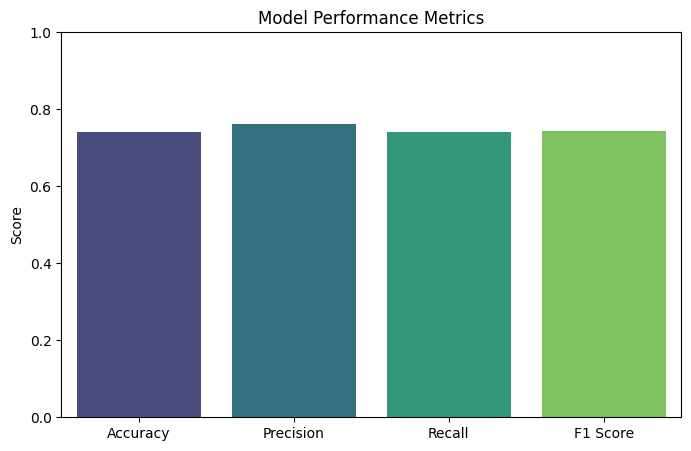

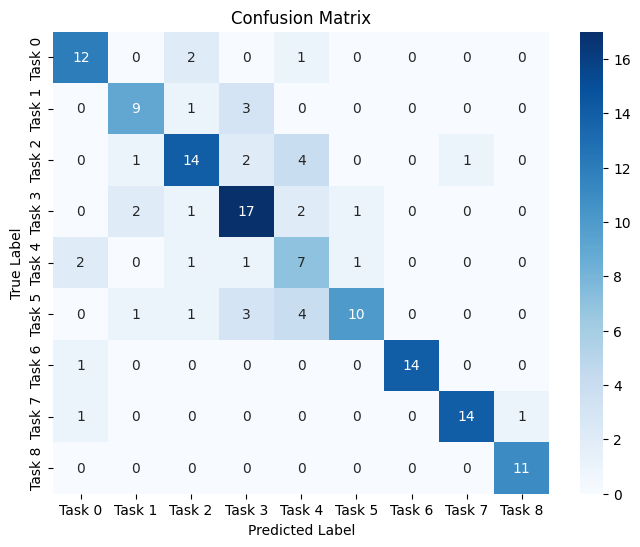

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_metrics(accuracy, precision, recall, f1):
    """Plot Accuracy, Precision, Recall, and F1 Score as a bar chart"""
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1]

    plt.figure(figsize=(8, 5))
    sns.barplot(x=metrics, y=values, palette="viridis")
    plt.ylim(0, 1)
    plt.title("Model Performance Metrics")
    plt.ylabel("Score")
    plt.show()

def plot_confusion_matrix(conf_matrix, class_names):
    """Plot the confusion matrix as a heatmap"""
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Evaluate model and plot metrics
accuracy, precision, recall, f1, conf_matrix = evaluate_model(model, test_loader)

# Get class names (assuming labels are from 0 to num_classes - 1)
class_names = [f"Task {i}" for i in range(conf_matrix.shape[0])]

# Plot the results
plot_metrics(accuracy, precision, recall, f1)
plot_confusion_matrix(conf_matrix, class_names)
